# [9660] Gaussian Mixture Models 1
Data file:
* https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/height_weight_distribution.csv

In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 11/17/24 21:31:53


### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

### Load data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/height_weight_distribution.csv')
df.shape

(500, 2)

### Examine data

In [4]:
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


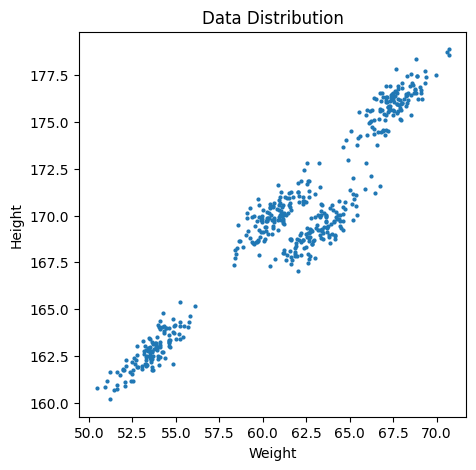

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(df["Weight"], df["Height"], s=4)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')
plt.show()

### Scale variables

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Weight', 'Height']])
df[['Weight', 'Height']] = scaled_data
df.head()

,Weight,Height
0,1.115742,1.368788
1,1.451113,1.848408
2,-0.065368,0.160139
3,-0.295929,-0.171612
4,0.801458,0.884926


### Train K-Means model

In [7]:
# Instantiate KMeans model
KM = KMeans(n_clusters=4, n_init=10, random_state=42)
KM.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [8]:
# Fit KMeans model
KM.fit(df)

KMeans(n_clusters=4, n_init=10, random_state=42)

### Test model

In [9]:
pred = KM.predict(df)

In [10]:
df['KM_cluster'] = pred
df.head()

,Weight,Height,KM_cluster
0,1.115742,1.368788,3
1,1.451113,1.848408,3
2,-0.065368,0.160139,2
3,-0.295929,-0.171612,2
4,0.801458,0.884926,3


### Visualize results

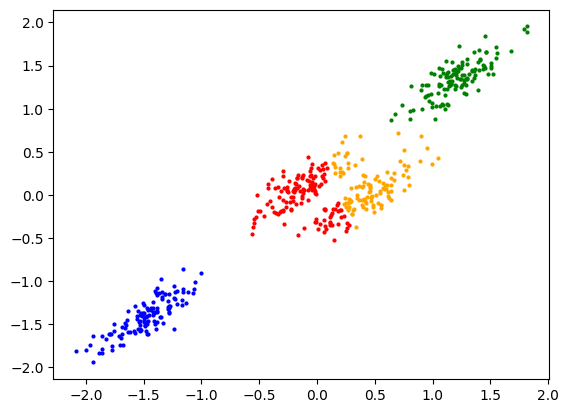

In [11]:
# Plot results
color=['blue','orange','red','green']
for k in range(0,4):
    tmp = df[df["KM_cluster"]==k]
    plt.scatter(tmp["Weight"], tmp["Height"], c=color[k], s=4)
plt.show()

The KMeans model failed to identify the right clusters.  
Look closely at the clusters in the center — KMeans tried to build a circular cluster even though the data distribution is elliptical.

### Train Gaussian Mixture model

In [12]:
# Clean up dataframe
df.drop(['KM_cluster'], axis=1, inplace=True)
df.head()

,Weight,Height
0,1.115742,1.368788
1,1.451113,1.848408
2,-0.065368,0.160139
3,-0.295929,-0.171612
4,0.801458,0.884926


In [13]:
# Instantiate Gaussian Mixture Model
GMM = GaussianMixture(n_components=4, random_state=42)
GMM.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 4,
 'n_init': 1,
 'precisions_init': None,
 'random_state': 42,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [14]:
# Fit Gaussian Mixture Model
GMM.fit(df)

GaussianMixture(n_components=4, random_state=42)

### Test model

In [15]:
pred2 = GMM.predict(df)

In [16]:
df['GMM_cluster_1'] = pred2
df.shape

(500, 3)

In [17]:
df.head()

,Weight,Height,GMM_cluster_1
0,1.115742,1.368788,0
1,1.451113,1.848408,0
2,-0.065368,0.160139,2
3,-0.295929,-0.171612,2
4,0.801458,0.884926,0


### Visualize updated results

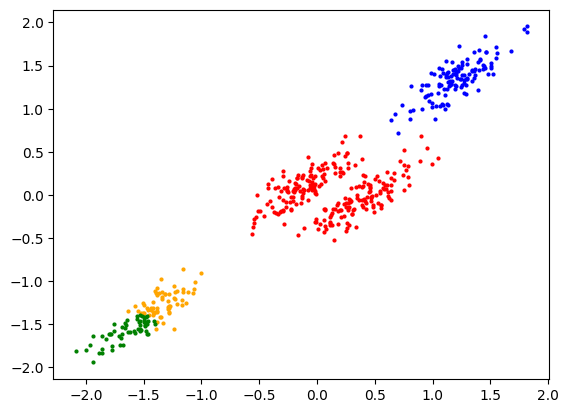

In [18]:
# Plot results
#color=['blue','orange','red','green']
for k in range(0,4):
    tmp = df[df["GMM_cluster_1"]==k]
    plt.scatter(tmp["Weight"], tmp["Height"], c=color[k], s=4)
plt.show()

The clusters above look more accurate, but not perfect

### Re-train Gaussian Mixture model with different # components

In [19]:
# Clean up dataframe
df.drop(['GMM_cluster_1'], axis=1, inplace=True)
df.head()

,Weight,Height
0,1.115742,1.368788
1,1.451113,1.848408
2,-0.065368,0.160139
3,-0.295929,-0.171612
4,0.801458,0.884926


In [20]:
# Instantiate Gaussian Mixture Model
GMM = GaussianMixture(n_components=3, random_state=42)

In [21]:
# Fit Gaussian Mixture Model
GMM.fit(df)

GaussianMixture(n_components=3, random_state=42)

### Test model

In [22]:
pred3 = GMM.predict(df)

In [23]:
df['GMM_cluster_2'] = pred3
df.shape

(500, 3)

In [24]:
df.head()

,Weight,Height,GMM_cluster_2
0,1.115742,1.368788,0
1,1.451113,1.848408,0
2,-0.065368,0.160139,2
3,-0.295929,-0.171612,2
4,0.801458,0.884926,0


### Visualize updated results

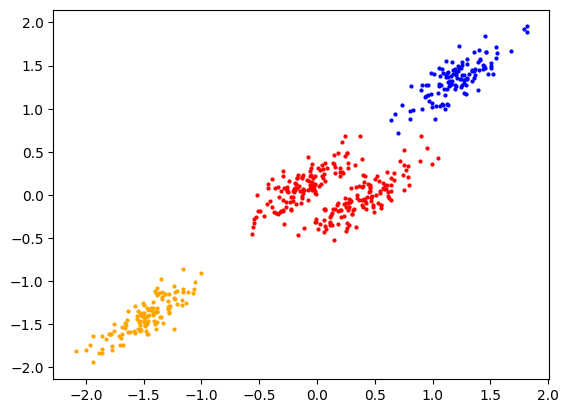

In [25]:
# Plot results
#color=['blue','orange','red','green']
for k in range(0,4):
    tmp = df[df["GMM_cluster_2"]==k]
    plt.scatter(tmp["Weight"], tmp["Height"], c=color[k], s=4)
plt.show()

The clusters above look better